# Jupyter notebook sample

In [98]:
from typing import Any

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray, dtype, number

# Read the image

In [41]:
image = cv.imread("Lena_noisy.png")

# Convert image into grayscale

In [42]:
image_grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Load the classifier and create a cascade object for face detection

In [43]:
face_cascade = cv.CascadeClassifier("haarcascade_frontalface_alt.xml")
detected_faces = face_cascade.detectMultiScale(image_grayscale)

# Draw rectangles on image

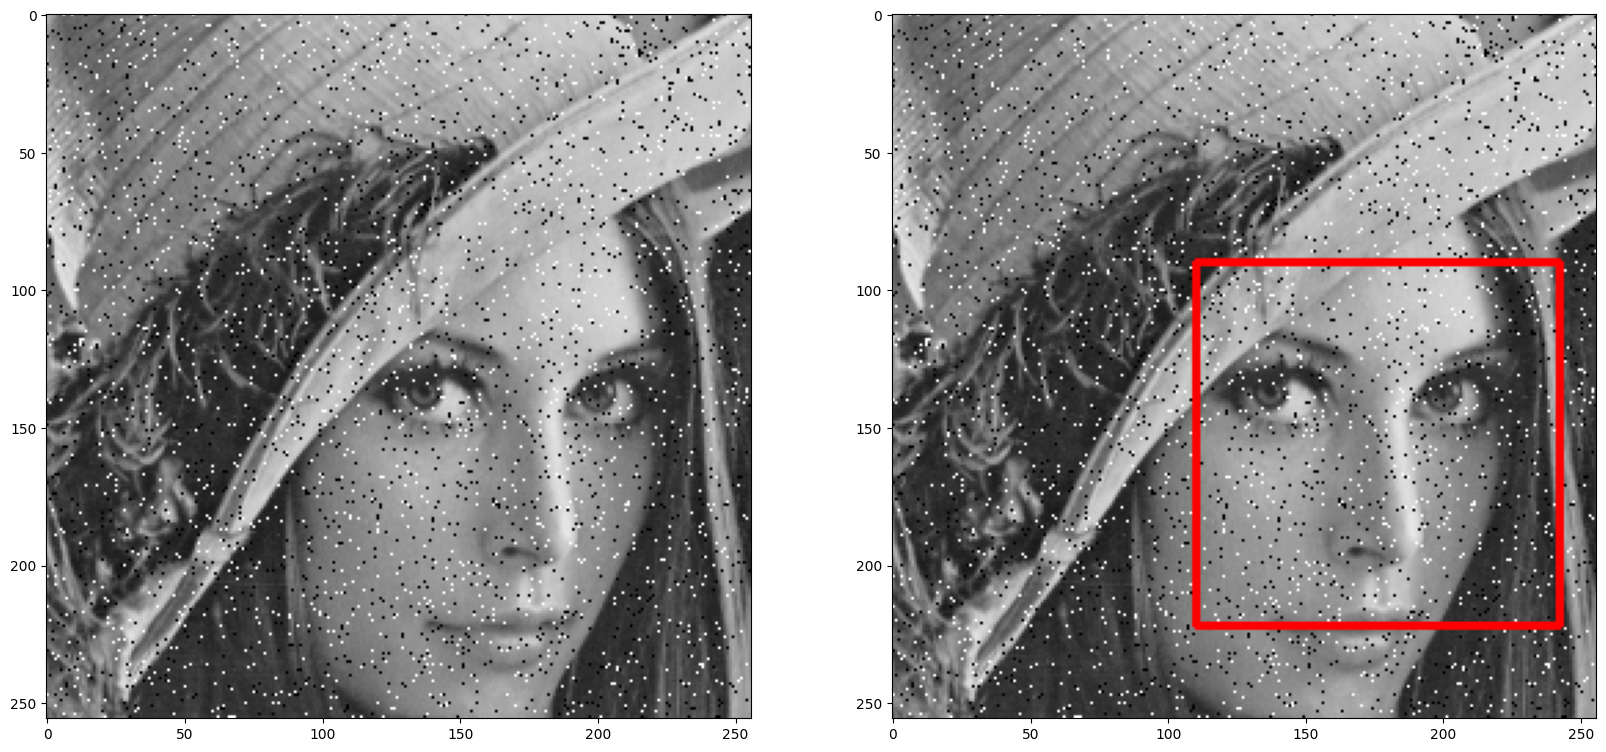

In [67]:
for (x, y, w, h) in detected_faces:
    cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)


_, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image_grayscale, cmap="gray")
ax[1].imshow(image)
plt.show()

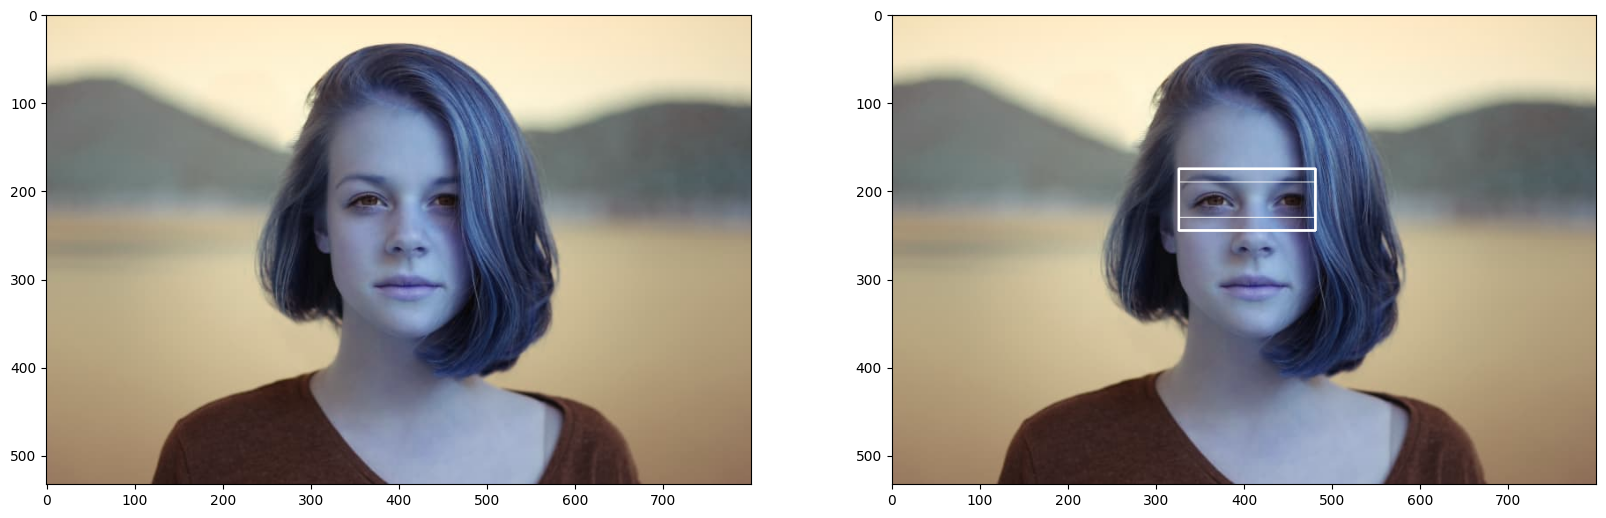

In [71]:
image2 = cv.imread("single-person.jpg")
image2_gray = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
_, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image2, cmap="gray")
cv.rectangle(image2, (325, 175), (480, 245), (255, 255, 255), 2)
cv.rectangle(image2, (325, 190), (480, 230), (255, 255, 255), 1)
ax[1].imshow(image2, cmap="gray")
plt.show()

# Image intégrale

Création d'une nouvelle image de même taille, mais dont chaque pixel représente la somme des pixels précédents. La somme se fait en trois opérations.
> Gris - jaune - bleu + vert = somme des valeurs du rectangle rouge


In [107]:
def integral_image_naive(image: np.ndarray) -> np.ndarray:
    int_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(i + 1):
                for l in range(j + 1):
                    int_image[i, j] = int_image[i, j] + image[k, l]
    return  int_image

In [109]:
def integral_image(image: np.ndarray) -> np.ndarray:
    int_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i == 0 and j == 0:
                int_image[i, j] = image[i, j]
            elif i == 0 and j > 0:
                int_image[i, j] = int_image[i, j - 1] + image[i, j]
            elif i > 0 and j == 0:
                int_image[i, j] = int_image[i - 1, j] + image[i, j]
            elif i > 0 and j > 0:
                int_image[i, j] = int_image[i - 1, j] + int_image[i, j - 1] - int_image[i - 1, j - 1] + image[i, j]
    return int_image

In [113]:
def sum_pixels_in_rectangle(int_image: np.ndarray, rect):
    return int_image[rect[0] + rect[2], rect[1] + rect[3]] - int_image[rect[0], rect[1] - 1 + rect[3]] - int_image[rect[0] + rect[2], rect[1] - 1] + int_image[rect[0] - 1, rect[1] - 1]

[[ 1  3 14 18]
 [ 6 26 41 46]
 [10 43 64 72]
 [17 51 73 93]]
[[ 1  3 14 18]
 [ 6 26 41 46]
 [10 43 64 72]
 [17 51 73 93]]
